# SBANN
## ~~Standard boring ass neural network~~
## Size and Batch Adaptable Neural Network

Import necessary packages

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

2023-05-16 14:37:26.457136: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Data

Define core features of the dataset

In [2]:
dim = 3
numpart = 30
latent_dim = 2

Import and reshape data

In [3]:
fname="/Users/lorenzobarbiero/Downloads/test_30_5_0.05_0.3_0.1_10000_1000_1000_x.txt"
with open(fname) as f:
    data = [
        [float(i.strip()) for i in s.split(" ") if i != ""]
        for s in f.read().split("\n")
        if s != ""]

In [4]:
print(data[1])

[3.336635, 3.919305, 2.734692, 2.592749, 4.251143, 1.946005, 2.569278, 3.558946, 1.099535, 1.667399, 3.546641, 1.910742, 3.946726, 3.046994, 3.533433, 3.616621, 4.690143, 2.065708, 2.188258, 2.073205, 3.390317, 2.870971, 1.58392, 1.38977, 0.881777, 3.249116, 2.602235, 3.601859, 3.606766, 1.670101, 3.70629, 2.790531, 2.431922, 1.024758, 2.594398, 1.747097, 3.518145, 2.076213, 3.334007, 1.493373, 1.851869, 2.595559, 2.699221, 3.27198, 2.19975, 3.862038, 1.674536, 2.120486, 2.676059, 2.141204, 2.371591, 4.356798, 3.745405, 2.542581, 4.051411, 2.062422, 1.172846, 1.13258, 2.598437, 3.509392, 2.092019, 2.509008, 1.536048, 1.824886, 2.864364, 2.783008, 4.619022, 2.99871, 1.713088, 2.896652, 2.9207, 3.160665, 2.252266, 3.891109, 2.91944, 1.303496, 3.737969, 3.581262, 3.164782, 2.567627, 1.428368, 2.143883, 3.1519, 3.877689, 3.152608, 2.577253, 4.17173, 3.995555, 3.055175, 0.792308]


In [5]:
vcs = np.array(data).reshape((-1,numpart,dim))
print(vcs.shape)

(10000, 30, 3)


Sort points

In [6]:
idx = np.lexsort((vcs[:,:,1], vcs[:,:,0]))

# Use the indices to sort each step while maintaining the rows intact
sorted_vcs = np.empty_like(vcs)
for i in range(len(vcs)):
    sorted_vcs[i] = vcs[i][idx[i]]
    
print(sorted_vcs.shape,"\n",sorted_vcs[1])

(10000, 30, 3) 
 [[0.881777 3.249116 2.602235]
 [1.024758 2.594398 1.747097]
 [1.13258  2.598437 3.509392]
 [1.303496 3.737969 3.581262]
 [1.493373 1.851869 2.595559]
 [1.667399 3.546641 1.910742]
 [1.824886 2.864364 2.783008]
 [2.092019 2.509008 1.536048]
 [2.143883 3.1519   3.877689]
 [2.188258 2.073205 3.390317]
 [2.252266 3.891109 2.91944 ]
 [2.569278 3.558946 1.099535]
 [2.592749 4.251143 1.946005]
 [2.676059 2.141204 2.371591]
 [2.699221 3.27198  2.19975 ]
 [2.870971 1.58392  1.38977 ]
 [2.896652 2.9207   3.160665]
 [3.152608 2.577253 4.17173 ]
 [3.164782 2.567627 1.428368]
 [3.336635 3.919305 2.734692]
 [3.518145 2.076213 3.334007]
 [3.601859 3.606766 1.670101]
 [3.616621 4.690143 2.065708]
 [3.70629  2.790531 2.431922]
 [3.862038 1.674536 2.120486]
 [3.946726 3.046994 3.533433]
 [3.995555 3.055175 0.792308]
 [4.051411 2.062422 1.172846]
 [4.356798 3.745405 2.542581]
 [4.619022 2.99871  1.713088]]


In [7]:
sorted_vcs = sorted_vcs.reshape((-1,90))
print(sorted_vcs.shape,"\n",sorted_vcs[1])

(10000, 90) 
 [0.881777 3.249116 2.602235 1.024758 2.594398 1.747097 1.13258  2.598437
 3.509392 1.303496 3.737969 3.581262 1.493373 1.851869 2.595559 1.667399
 3.546641 1.910742 1.824886 2.864364 2.783008 2.092019 2.509008 1.536048
 2.143883 3.1519   3.877689 2.188258 2.073205 3.390317 2.252266 3.891109
 2.91944  2.569278 3.558946 1.099535 2.592749 4.251143 1.946005 2.676059
 2.141204 2.371591 2.699221 3.27198  2.19975  2.870971 1.58392  1.38977
 2.896652 2.9207   3.160665 3.152608 2.577253 4.17173  3.164782 2.567627
 1.428368 3.336635 3.919305 2.734692 3.518145 2.076213 3.334007 3.601859
 3.606766 1.670101 3.616621 4.690143 2.065708 3.70629  2.790531 2.431922
 3.862038 1.674536 2.120486 3.946726 3.046994 3.533433 3.995555 3.055175
 0.792308 4.051411 2.062422 1.172846 4.356798 3.745405 2.542581 4.619022
 2.99871  1.713088]


Split in training and test set

In [8]:
train_perc=0.8
trainset = sorted_vcs[:int(train_perc*len(data))]
print(trainset.shape)
testset = sorted_vcs[int(train_perc*len(data)):]
print(testset.shape)

(8000, 90)
(2000, 90)


### Sampling class

In [9]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

### Encoder

In [10]:
input_shape = (numpart*dim)
inputs = layers.Input(shape=input_shape)
x = layers.Dense(int(numpart*dim*2/3), activation='relu')(inputs)
x = layers.Dense(int(numpart*dim*1/2), activation='relu')(x)
x = layers.Dense(int(numpart*dim*1/4), activation='relu')(x)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 90)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 60)           5460        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 45)           2745        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 22)           1012        ['dense_1[0][0]']                
                                                                                            

2023-05-16 14:37:30.263790: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Decoder

In [11]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(int(numpart*dim*1/4), activation="relu")(latent_inputs)
x = layers.Dense(int(numpart*dim*1/2), activation="relu")(x)
x = layers.Dense(int(numpart*dim*2/3), activation="relu")(x)
decoder_outputs = layers.Dense(numpart*dim, activation="relu")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_3 (Dense)             (None, 22)                66        
                                                                 
 dense_4 (Dense)             (None, 45)                1035      
                                                                 
 dense_5 (Dense)             (None, 60)                2760      
                                                                 
 dense_6 (Dense)             (None, 90)                5490      
                                                                 
Total params: 9,351
Trainable params: 9,351
Non-trainable params: 0
_________________________________________________________________


### VAE Class

In [12]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.mean_squared_error(data, reconstruction)
            )
            kl_loss = -0.5 * (
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            )
            kl_loss = tf.reduce_mean(kl_loss)
            total_loss = reconstruction_loss + reg_lambda * kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

### Train VAE

In [13]:
reg_lambda=0.01
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
fit=vae.fit(trainset, epochs=600, batch_size=128, verbose=2)

Epoch 1/600
63/63 - 1s - loss: 3.2516 - reconstruction_loss: 3.0281 - kl_loss: 22.3512 - 505ms/epoch - 8ms/step
Epoch 2/600
63/63 - 0s - loss: 2.2472 - reconstruction_loss: 2.1807 - kl_loss: 6.6569 - 72ms/epoch - 1ms/step
Epoch 3/600
63/63 - 0s - loss: 2.2186 - reconstruction_loss: 2.1736 - kl_loss: 4.5020 - 69ms/epoch - 1ms/step
Epoch 4/600
63/63 - 0s - loss: 2.2036 - reconstruction_loss: 2.1665 - kl_loss: 3.7050 - 69ms/epoch - 1ms/step
Epoch 5/600
63/63 - 0s - loss: 2.1263 - reconstruction_loss: 2.0925 - kl_loss: 3.3795 - 70ms/epoch - 1ms/step
Epoch 6/600
63/63 - 0s - loss: 2.1053 - reconstruction_loss: 2.0733 - kl_loss: 3.2000 - 67ms/epoch - 1ms/step
Epoch 7/600
63/63 - 0s - loss: 2.0473 - reconstruction_loss: 2.0169 - kl_loss: 3.0365 - 76ms/epoch - 1ms/step
Epoch 8/600
63/63 - 0s - loss: 1.9638 - reconstruction_loss: 1.9350 - kl_loss: 2.8838 - 79ms/epoch - 1ms/step
Epoch 9/600
63/63 - 0s - loss: 1.9607 - reconstruction_loss: 1.9329 - kl_loss: 2.7811 - 79ms/epoch - 1ms/step
Epoch 10

Epoch 75/600
63/63 - 0s - loss: 1.7236 - reconstruction_loss: 1.7058 - kl_loss: 1.7833 - 80ms/epoch - 1ms/step
Epoch 76/600
63/63 - 0s - loss: 1.7244 - reconstruction_loss: 1.7067 - kl_loss: 1.7658 - 78ms/epoch - 1ms/step
Epoch 77/600
63/63 - 0s - loss: 1.7249 - reconstruction_loss: 1.7071 - kl_loss: 1.7749 - 76ms/epoch - 1ms/step
Epoch 78/600
63/63 - 0s - loss: 1.7243 - reconstruction_loss: 1.7067 - kl_loss: 1.7589 - 75ms/epoch - 1ms/step
Epoch 79/600
63/63 - 0s - loss: 1.7241 - reconstruction_loss: 1.7066 - kl_loss: 1.7467 - 75ms/epoch - 1ms/step
Epoch 80/600
63/63 - 0s - loss: 1.7240 - reconstruction_loss: 1.7066 - kl_loss: 1.7398 - 70ms/epoch - 1ms/step
Epoch 81/600
63/63 - 0s - loss: 1.7237 - reconstruction_loss: 1.7064 - kl_loss: 1.7296 - 67ms/epoch - 1ms/step
Epoch 82/600
63/63 - 0s - loss: 1.7236 - reconstruction_loss: 1.7064 - kl_loss: 1.7257 - 67ms/epoch - 1ms/step
Epoch 83/600
63/63 - 0s - loss: 1.7236 - reconstruction_loss: 1.7064 - kl_loss: 1.7152 - 70ms/epoch - 1ms/step
E

Epoch 149/600
63/63 - 0s - loss: 1.5582 - reconstruction_loss: 1.5428 - kl_loss: 1.5366 - 69ms/epoch - 1ms/step
Epoch 150/600
63/63 - 0s - loss: 1.5576 - reconstruction_loss: 1.5421 - kl_loss: 1.5479 - 68ms/epoch - 1ms/step
Epoch 151/600
63/63 - 0s - loss: 1.5587 - reconstruction_loss: 1.5433 - kl_loss: 1.5417 - 67ms/epoch - 1ms/step
Epoch 152/600
63/63 - 0s - loss: 1.5585 - reconstruction_loss: 1.5429 - kl_loss: 1.5581 - 67ms/epoch - 1ms/step
Epoch 153/600
63/63 - 0s - loss: 1.5580 - reconstruction_loss: 1.5426 - kl_loss: 1.5429 - 68ms/epoch - 1ms/step
Epoch 154/600
63/63 - 0s - loss: 1.5578 - reconstruction_loss: 1.5422 - kl_loss: 1.5592 - 68ms/epoch - 1ms/step
Epoch 155/600
63/63 - 0s - loss: 1.5585 - reconstruction_loss: 1.5432 - kl_loss: 1.5367 - 67ms/epoch - 1ms/step
Epoch 156/600
63/63 - 0s - loss: 1.5577 - reconstruction_loss: 1.5422 - kl_loss: 1.5483 - 68ms/epoch - 1ms/step
Epoch 157/600
63/63 - 0s - loss: 1.5573 - reconstruction_loss: 1.5420 - kl_loss: 1.5316 - 67ms/epoch - 1

Epoch 223/600
63/63 - 0s - loss: 1.5516 - reconstruction_loss: 1.5316 - kl_loss: 1.9963 - 68ms/epoch - 1ms/step
Epoch 224/600
63/63 - 0s - loss: 1.5416 - reconstruction_loss: 1.5236 - kl_loss: 1.7948 - 69ms/epoch - 1ms/step
Epoch 225/600
63/63 - 0s - loss: 1.5356 - reconstruction_loss: 1.5169 - kl_loss: 1.8626 - 70ms/epoch - 1ms/step
Epoch 226/600
63/63 - 0s - loss: 1.5347 - reconstruction_loss: 1.5153 - kl_loss: 1.9372 - 72ms/epoch - 1ms/step
Epoch 227/600
63/63 - 0s - loss: 1.5346 - reconstruction_loss: 1.5159 - kl_loss: 1.8758 - 71ms/epoch - 1ms/step
Epoch 228/600
63/63 - 0s - loss: 1.5337 - reconstruction_loss: 1.5147 - kl_loss: 1.9034 - 67ms/epoch - 1ms/step
Epoch 229/600
63/63 - 0s - loss: 1.5399 - reconstruction_loss: 1.5219 - kl_loss: 1.7956 - 67ms/epoch - 1ms/step
Epoch 230/600
63/63 - 0s - loss: 1.5368 - reconstruction_loss: 1.5188 - kl_loss: 1.7947 - 67ms/epoch - 1ms/step
Epoch 231/600
63/63 - 0s - loss: 1.5391 - reconstruction_loss: 1.5213 - kl_loss: 1.7725 - 67ms/epoch - 1

Epoch 297/600
63/63 - 0s - loss: 1.5325 - reconstruction_loss: 1.5136 - kl_loss: 1.8933 - 68ms/epoch - 1ms/step
Epoch 298/600
63/63 - 0s - loss: 1.5337 - reconstruction_loss: 1.5143 - kl_loss: 1.9444 - 69ms/epoch - 1ms/step
Epoch 299/600
63/63 - 0s - loss: 1.5353 - reconstruction_loss: 1.5160 - kl_loss: 1.9312 - 67ms/epoch - 1ms/step
Epoch 300/600
63/63 - 0s - loss: 1.5330 - reconstruction_loss: 1.5142 - kl_loss: 1.8834 - 67ms/epoch - 1ms/step
Epoch 301/600
63/63 - 0s - loss: 1.5367 - reconstruction_loss: 1.5174 - kl_loss: 1.9283 - 67ms/epoch - 1ms/step
Epoch 302/600
63/63 - 0s - loss: 1.5375 - reconstruction_loss: 1.5179 - kl_loss: 1.9588 - 67ms/epoch - 1ms/step
Epoch 303/600
63/63 - 0s - loss: 1.5443 - reconstruction_loss: 1.5247 - kl_loss: 1.9527 - 68ms/epoch - 1ms/step
Epoch 304/600
63/63 - 0s - loss: 1.5393 - reconstruction_loss: 1.5198 - kl_loss: 1.9489 - 68ms/epoch - 1ms/step
Epoch 305/600
63/63 - 0s - loss: 1.5375 - reconstruction_loss: 1.5184 - kl_loss: 1.9125 - 68ms/epoch - 1

Epoch 371/600
63/63 - 0s - loss: 1.4054 - reconstruction_loss: 1.3891 - kl_loss: 1.6283 - 68ms/epoch - 1ms/step
Epoch 372/600
63/63 - 0s - loss: 1.4050 - reconstruction_loss: 1.3887 - kl_loss: 1.6260 - 67ms/epoch - 1ms/step
Epoch 373/600
63/63 - 0s - loss: 1.4045 - reconstruction_loss: 1.3882 - kl_loss: 1.6309 - 67ms/epoch - 1ms/step
Epoch 374/600
63/63 - 0s - loss: 1.4041 - reconstruction_loss: 1.3879 - kl_loss: 1.6265 - 70ms/epoch - 1ms/step
Epoch 375/600
63/63 - 0s - loss: 1.4042 - reconstruction_loss: 1.3876 - kl_loss: 1.6578 - 74ms/epoch - 1ms/step
Epoch 376/600
63/63 - 0s - loss: 1.4024 - reconstruction_loss: 1.3851 - kl_loss: 1.7362 - 73ms/epoch - 1ms/step
Epoch 377/600
63/63 - 0s - loss: 1.4011 - reconstruction_loss: 1.3803 - kl_loss: 2.0786 - 73ms/epoch - 1ms/step
Epoch 378/600
63/63 - 0s - loss: 1.3997 - reconstruction_loss: 1.3790 - kl_loss: 2.0696 - 72ms/epoch - 1ms/step
Epoch 379/600
63/63 - 0s - loss: 1.4008 - reconstruction_loss: 1.3806 - kl_loss: 2.0213 - 70ms/epoch - 1

Epoch 445/600
63/63 - 0s - loss: 1.3981 - reconstruction_loss: 1.3805 - kl_loss: 1.7596 - 71ms/epoch - 1ms/step
Epoch 446/600
63/63 - 0s - loss: 1.3962 - reconstruction_loss: 1.3786 - kl_loss: 1.7650 - 72ms/epoch - 1ms/step
Epoch 447/600
63/63 - 0s - loss: 1.3979 - reconstruction_loss: 1.3800 - kl_loss: 1.7869 - 71ms/epoch - 1ms/step
Epoch 448/600
63/63 - 0s - loss: 1.3969 - reconstruction_loss: 1.3792 - kl_loss: 1.7743 - 70ms/epoch - 1ms/step
Epoch 449/600
63/63 - 0s - loss: 1.3971 - reconstruction_loss: 1.3793 - kl_loss: 1.7754 - 72ms/epoch - 1ms/step
Epoch 450/600
63/63 - 0s - loss: 1.3970 - reconstruction_loss: 1.3794 - kl_loss: 1.7595 - 72ms/epoch - 1ms/step
Epoch 451/600
63/63 - 0s - loss: 1.3295 - reconstruction_loss: 1.3116 - kl_loss: 1.7938 - 72ms/epoch - 1ms/step
Epoch 452/600
63/63 - 0s - loss: 1.1906 - reconstruction_loss: 1.1729 - kl_loss: 1.7743 - 70ms/epoch - 1ms/step
Epoch 453/600
63/63 - 0s - loss: 1.1854 - reconstruction_loss: 1.1676 - kl_loss: 1.7755 - 72ms/epoch - 1

Epoch 519/600
63/63 - 0s - loss: 1.1157 - reconstruction_loss: 1.0976 - kl_loss: 1.8059 - 69ms/epoch - 1ms/step
Epoch 520/600
63/63 - 0s - loss: 1.1132 - reconstruction_loss: 1.0951 - kl_loss: 1.8139 - 68ms/epoch - 1ms/step
Epoch 521/600
63/63 - 0s - loss: 1.1128 - reconstruction_loss: 1.0944 - kl_loss: 1.8337 - 66ms/epoch - 1ms/step
Epoch 522/600
63/63 - 0s - loss: 1.1124 - reconstruction_loss: 1.0943 - kl_loss: 1.8153 - 68ms/epoch - 1ms/step
Epoch 523/600
63/63 - 0s - loss: 1.1116 - reconstruction_loss: 1.0934 - kl_loss: 1.8265 - 67ms/epoch - 1ms/step
Epoch 524/600
63/63 - 0s - loss: 1.1115 - reconstruction_loss: 1.0934 - kl_loss: 1.8111 - 67ms/epoch - 1ms/step
Epoch 525/600
63/63 - 0s - loss: 1.1123 - reconstruction_loss: 1.0940 - kl_loss: 1.8285 - 67ms/epoch - 1ms/step
Epoch 526/600
63/63 - 0s - loss: 1.1121 - reconstruction_loss: 1.0938 - kl_loss: 1.8263 - 67ms/epoch - 1ms/step
Epoch 527/600
63/63 - 0s - loss: 1.1136 - reconstruction_loss: 1.0954 - kl_loss: 1.8223 - 67ms/epoch - 1

Epoch 593/600
63/63 - 0s - loss: 1.1131 - reconstruction_loss: 1.0947 - kl_loss: 1.8445 - 68ms/epoch - 1ms/step
Epoch 594/600
63/63 - 0s - loss: 1.1144 - reconstruction_loss: 1.0961 - kl_loss: 1.8334 - 68ms/epoch - 1ms/step
Epoch 595/600
63/63 - 0s - loss: 1.1156 - reconstruction_loss: 1.0971 - kl_loss: 1.8576 - 68ms/epoch - 1ms/step
Epoch 596/600
63/63 - 0s - loss: 1.1139 - reconstruction_loss: 1.0955 - kl_loss: 1.8393 - 67ms/epoch - 1ms/step
Epoch 597/600
63/63 - 0s - loss: 1.1145 - reconstruction_loss: 1.0960 - kl_loss: 1.8472 - 68ms/epoch - 1ms/step
Epoch 598/600
63/63 - 0s - loss: 1.1147 - reconstruction_loss: 1.0965 - kl_loss: 1.8204 - 68ms/epoch - 1ms/step
Epoch 599/600
63/63 - 0s - loss: 1.1137 - reconstruction_loss: 1.0952 - kl_loss: 1.8427 - 67ms/epoch - 1ms/step
Epoch 600/600
63/63 - 0s - loss: 1.1127 - reconstruction_loss: 1.0941 - kl_loss: 1.8615 - 67ms/epoch - 1ms/step


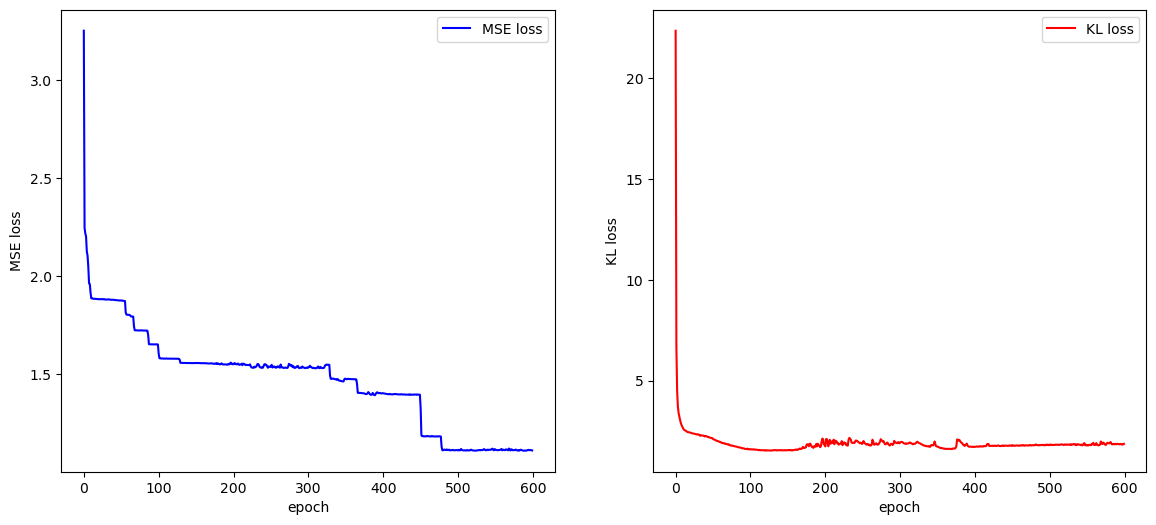

In [14]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['loss'],label="MSE loss",c="b")
ax.set_xlabel('epoch')
ax.set_ylabel("MSE loss")
ax.legend()
ax=AX[1]
ax.plot(fit.history['kl_loss'],label="KL loss",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("KL loss")
ax.legend()

## Evaluate performance
We'll now use the test set to explore the latent space distribution of data and the reconstruction accuracy

In [15]:
encoded_test = np.array(vae.encoder.predict(testset))

63/63 [==============================] - 0s 513us/step


In [16]:
print(encoded_test.shape)

(3, 2000, 2)


In [17]:
decoded_test = decoder.predict(encoded_test)

ValueError: in user code:

    File "/Users/lorenzobarbiero/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/Users/lorenzobarbiero/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/lorenzobarbiero/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/lorenzobarbiero/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/Users/lorenzobarbiero/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/lorenzobarbiero/anaconda3/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "decoder" is incompatible with the layer: expected shape=(None, 2), found shape=(None, 2000, 2)
